In [84]:
import pandas as pd

# orig_url = "https://drive.google.com/file/d/12fFZ9k8wsmWBVUhcsVxmKsqHxaVzAzqt/view?usp=sharing"
# file_id = orig_url.split('/')[-2]
# data_path='https://drive.google.com/uc?export=download&id=' + file_id

data_path='https://drive.google.com/uc?export=download&id=1A3MUldrs0z09DlYR6Y1utfySwKNO9Qsz'
df = pd.read_csv(data_path)
df.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [12]:
 !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/s e

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, f1_score

In [86]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [87]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [88]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

In [89]:
df["TotalCharges"]= df["TotalCharges"].apply(lambda x: "0" if x == " " else x )

In [90]:
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [101]:
df.dtypes

Unnamed: 0             int64
customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [105]:
df.columns


Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
#Correlation Analysis
##prepare
df['Churn'].replace(to_replace=['Yes', 'No'], value=[1, 0],inplace=True)
#drop
df.drop(columns = ['Unnamed: 0','customerID'], inplace=True)
#get dummies to plot correlation of featuresabs
df_dummies=pd.get_dummies(df)


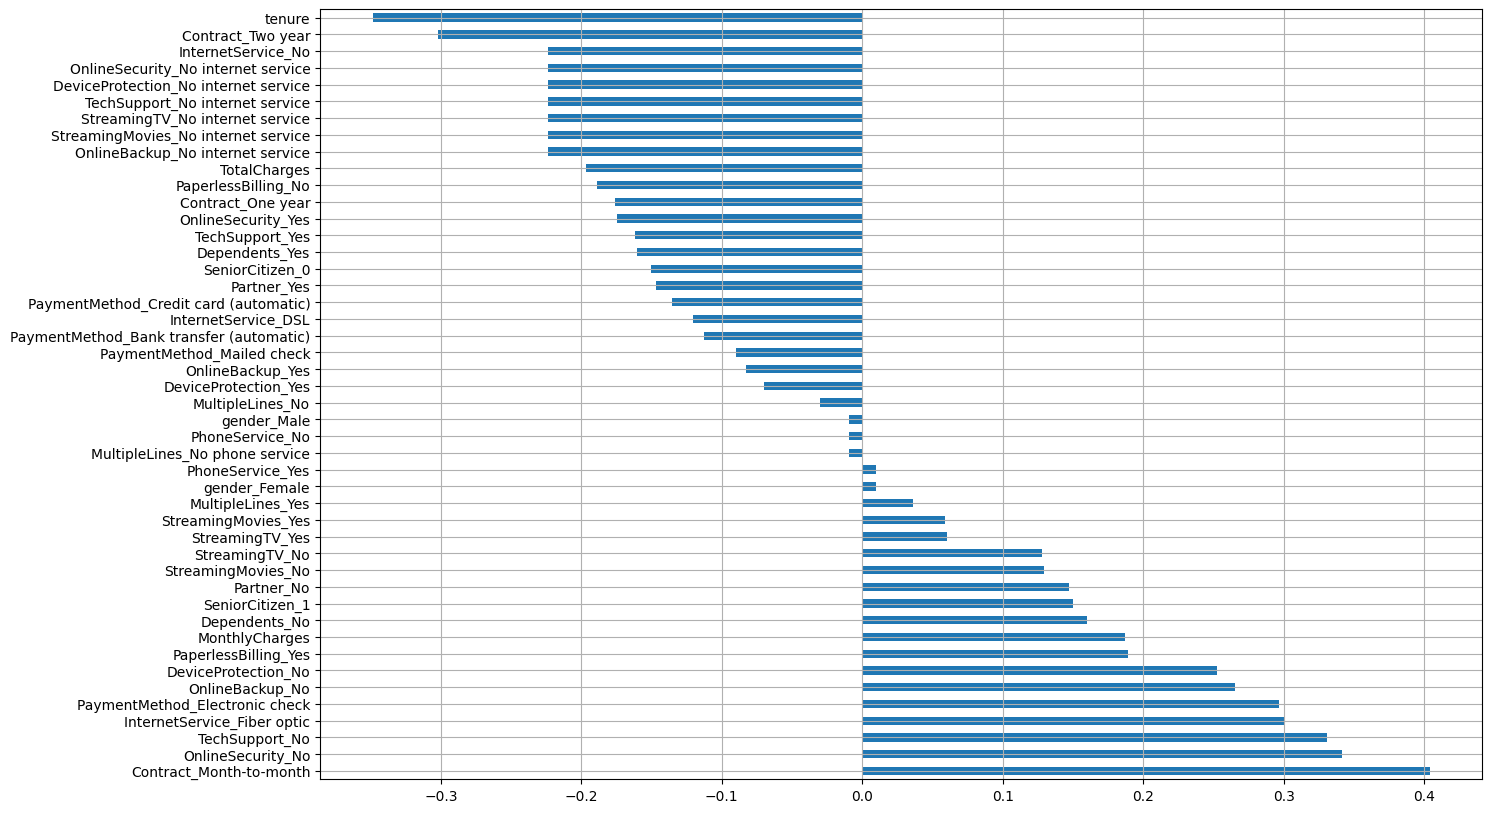

In [120]:
# check correlation
plt.figure(figsize=(15,10))

#plot the correlation between 'Churn' column and the other columns, hide churn column
correlation = df_dummies.drop('Churn', axis=1).corrwith(df_dummies['Churn']).sort_values(ascending=False)
correlation.plot(kind='barh')
plt.grid()

In [121]:
df_dummies.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
SeniorCitizen_0                              uint8
SeniorCitizen_1                              uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [122]:
df_dummies.shape

(5986, 47)

In [123]:
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn']

In [124]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4190, 46), (1796, 46), (4190,), (1796,))

In [129]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc_model = RandomForestRegressor(random_state=42)
rfc_model.fit(X_train, y_train)
predictionforest = rfc_model.predict(X_test)

predictions = rfc_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE without scaling: ", rmse)

MSE: 0.15092101748073952
RMSE without scaling:  0.38848554346428327


In [130]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5, random_state=42).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[1129  191]
 [ 216  260]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1320
           1       0.58      0.55      0.56       476

    accuracy                           0.77      1796
   macro avg       0.71      0.70      0.70      1796
weighted avg       0.77      0.77      0.77      1796



In [131]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state=42)

random_search = {
                  'criterion': ['entropy', 'gini'],
                  'max_depth': [10, 20, None],
                  'max_features': ['sqrt', 'log2'],
                  'n_estimators': [50, 100, 200]
                 }

               # 2 x 3 x 2 x 3 = 36 => randomly selects 10 combinations (models) from 36 possible model hyperparameter configs
               # 1. RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', n_estimators=50)
               # 2. RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2', n_estimators=200)
               # ... total of n_iter models


random_search_obj = RandomizedSearchCV(estimator=clf,
                           param_distributions=random_search,
                           n_iter=10, # total number of models it will try out by random selections
                           scoring='f1',
                           cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_obj.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=1)

In [133]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42)

grid_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': [10, 20, None],
                 'max_features': ['sqrt', 'log2'],
                 'n_estimators': [50, 100, 200]}
               # 2 x 3 x 2 x 3 = 36 => Total of 36 models from 36 possible model hyperparameter configs
               # 1. RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=50)
               # 2. RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', n_estimators=50)
               # 3. RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', n_estimators=50)
               # 4. RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2', n_estimators=50)
               # ... total of 36 models


grid_search_obj = GridSearchCV(estimator=clf,
                               param_grid=grid_search,
                               scoring='f1', cv=3, verbose=5, n_jobs=-1)

grid_search_obj.fit(X_train,y_train)

predictionforest = grid_search_obj.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[[1196  124]
 [ 253  223]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1320
           1       0.64      0.47      0.54       476

    accuracy                           0.79      1796
   macro avg       0.73      0.69      0.70      1796
weighted avg       0.78      0.79      0.78      1796



In [22]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=8ec0091a251e554abb2c4434c15d77d83652877b5a41586002c29a98abc7d7de
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp43ymep3f
  JVM stdout: /tmp/tmp43ymep3f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp43ymep3f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,20 hours and 43 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_hfje2o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3499,2150-OEGBV,Male,0,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.10,562.60
579,0565-JUPYD,Male,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,One year,No,Credit card (automatic),104.50,6590.80
3722,7317-GGVPB,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.90
247,2316-ESMLS,Female,0,Yes,Yes,12,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),33.15,444.75
5154,7508-MYBOG,Male,0,Yes,No,14,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.10,1235.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,7908-QCBCA,Female,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.40,69.40
4496,2428-ZMCTB,Male,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.75,208.25
3202,5688-KZTSN,Male,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.00,288.05
782,1088-CNNKB,Male,0,Yes,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),80.00,5040.20


In [25]:
train_data = pd.concat([X_train.drop(columns = ["customerID"]), y_train.drop(columns = ["customerID"])], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Churn'] = train_data['Churn'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Male,0,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.1,562.6,No
Male,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,One year,No,Credit card (automatic),104.5,6590.8,No
Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.6,7690.9,Yes
Female,0,Yes,Yes,12,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),33.15,444.75,No
Male,0,Yes,No,14,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.1,1235.55,Yes
Female,1,Yes,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),97.95,5936.55,No
Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.3,2679.7,No
Female,0,No,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),99.45,5623.7,No
Male,1,Yes,No,30,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.5,2917.65,No
Male,0,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),96.9,4473.45,No


In [26]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.drop(columns = ["customerID"]).columns.tolist(), y=y_train.drop(columns = ["customerID"]).name, training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20231221_131619_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    36                 36                          9240                   4            4            4             13            16            15.8333

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12061180801968886
RMSE: 0.34729210762654666
LogLoss: 0.37803758052768616
Mean Per-Class Error: 0.20190474714895978
AUC: 0.8819259646003573
AUCPR: 0.7290334186813704
Gini: 0.7638519292007147

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34441315855412963
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     2559  520    0.1689   (520.0/3079.0)
Yes    261   850    0.2349   (261.0/1111.0)
Total  2820  1370   0.1864   (781.0/4190.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.344413     0.685208  203
max f2                       0.192347     0.777812  278
max f0point5                 0.540698     0.688521  120
max accuracy                 0.421702     0.82864   166
max precision                0.888684     1         0
max recall                   0.0278652    1         394
max specificity              0.888684     1         0
max absolute_mcc             0.344413     0.560999  203
max min_per_class_accuracy   0.308823     0.79928   220
max mean_per_class_accuracy  0.295922     0.801375  226
max tns                      0.888684     3079      0
max fns                      0.888684     1109      0
max fps                      0.0203386    3079      399
max tps                      0.0278652    1111      394
max tnr                      0.888684     1         0
max fnr                      0.888684     0.9982    0
max fpr                      0.0203386    1         399
max tpr                      0.0278652    1         394

Gains/Lift Table: Avg response rate: 26.52 %, avg score: 26.55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100239                   0.81559            3.50199    3.50199            0.928571         0.844053   0.928571                    0.844053            0.0351035       0.0351035                  250.199   250.199            0.0341292
2        0.0207637                   0.79798            3.26853    3.38123            0.866667         0.805557   0.896552                    0.824141            0.0351035       0.070207                   226.853   238.123            0.067284
3        0.0300716                   0.776632           3.48127    3.4122             0.923077         0.789577   0.904762                    0.813443            0.0324032       0.10261                    248.127   241.22             0.0987129
4        0.0412888                   0.759083           3.61089    3.46618            0.957447         0.769483   0.919075                    0.8015              0.0405041       0.143114                   261.089   246.618            0.138567
5        0.0501193                   0.74509            3.26173    3.43016            0.864865         0.751589   0.9095

In [27]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20231221_131619_model_2,0.844503,0.417249,0.655195,0.236596,0.367847,0.135311,317,0.026171,GBM
GBM_1_AutoML_1_20231221_131619,0.844264,0.416722,0.661547,0.24317,0.367274,0.134891,1092,0.020301,GBM
GBM_grid_1_AutoML_1_20231221_131619_model_3,0.842997,0.418056,0.664206,0.239426,0.36735,0.134946,408,0.021704,GBM
GLM_1_AutoML_1_20231221_131619,0.840665,0.421905,0.644644,0.235761,0.370198,0.137046,755,0.004882,GLM
GBM_grid_1_AutoML_1_20231221_131619_model_4,0.839939,0.421559,0.655704,0.238285,0.369065,0.136209,500,0.027545,GBM
GBM_5_AutoML_1_20231221_131619,0.839684,0.423008,0.644363,0.23744,0.371093,0.13771,378,0.017132,GBM
GBM_2_AutoML_1_20231221_131619,0.837692,0.425373,0.64443,0.241259,0.371695,0.138157,1406,0.018658,GBM
XGBoost_grid_1_AutoML_1_20231221_131619_model_7,0.837013,0.42826,0.649145,0.251976,0.371855,0.138276,782,0.007943,XGBoost
GBM_3_AutoML_1_20231221_131619,0.836135,0.427333,0.643344,0.244279,0.372368,0.138658,947,0.019251,GBM
XGBoost_3_AutoML_1_20231221_131619,0.835633,0.430675,0.641817,0.247527,0.373718,0.139665,1151,0.006987,XGBoost


In [28]:
leader_model = aml.leader
leader_model.get_params()

{'model_id': None,
 'training_frame': None,
 'validation_frame': None,
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'auto',
 'fold_column': None,
 'response_column': None,
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 50,
 'max_depth': 5,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': None,
 'stopping_rounds': 0,
 'stopping_metric': 'auto',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': -1,
 'build_tree_one_node': False,
 'learn_rate': 0.1,
 'learn_rate_annealing': 1.0,
 'distribution': 'auto',
 'quantile_alpha': 0.5,
 'tweedie_power': 1.5,
 'huber_alp

In [29]:
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3564,7623-TRNQN,Male,0,No,Yes,1,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.90,49.90
4620,3487-EARAT,Female,0,Yes,Yes,70,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),74.10,5222.30
4312,5074-FBGHB,Male,0,No,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.65,6889.80
1187,9860-LISIZ,Female,0,No,No,34,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,673.20
4990,5828-AVIPD,Male,0,Yes,Yes,19,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.95,1875.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,4361-BKAXE,Female,0,No,No,41,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),114.50,4527.45
5489,2082-CEFLT,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.60,45.60
3115,5141-ZUVBH,Female,0,No,Yes,9,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),93.00,870.25
5506,7851-WZEKY,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.15,196.90


In [30]:
X_test_h2o = h2o.H2OFrame.from_python(X_test.drop(columns = ["customerID"]))
y_pred = leader_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [31]:
y_test

3564    Yes
4620     No
4312     No
1187     No
4990    Yes
       ... 
5097    Yes
5489    Yes
3115     No
5506    Yes
4851     No
Name: Churn, Length: 1796, dtype: object

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.82      0.85      1320
         Yes       0.57      0.68      0.62       476

    accuracy                           0.78      1796
   macro avg       0.72      0.75      0.73      1796
weighted avg       0.80      0.78      0.79      1796



In [33]:
print(confusion_matrix(y_test, y_pred))

[[1080  240]
 [ 154  322]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
logi = LogisticRegression(C=1.0,
                          dual=False,
                                      fit_intercept=True,
                                      intercept_scaling=1,
                                      max_iter=1000,
                                      multi_class='auto',
                                      penalty='l2',
                                      random_state=42,
                                      solver='lbfgs',
                                      tol=0.0001,
                                      verbose=0,
                                      class_weight='balanced')
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
#categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

#Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=0), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])


pipeline = Pipeline([
                     ('preprocessor', preprocessor),
                     ('classifier', logi)
                    ])

#Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#Make predictions on the test set
y_pred = pipeline.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
